## Solution for Day 4 assignment from Monday, Sept. 21

In [28]:
#get 10 files, each is the same timestep for a member of a
#10 member ensemble
data_download=False
if data_download:
    root='http://clouds.eos.ubc.ca/~phil/docs/atsc500/dryles'
    for i in np.arange(1,11,dtype=np.int):
        the_name='mar12014_{:d}_15600.nc'.format(i)
        print(the_name)
        url='{}/{}'.format(root,the_name)
        urllib.request.urlretrieve(url,the_name)
           

Hand in a notebook that:

    * Plots the vertical profile of the ensemble-averaged sensible heat (enthalpy) flux 
      for the bottom 1km of the dryles simulation
    
    * plots the vertical profile of the total perturbation kinetic energy (Stull 2.5c)


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from netCDF4 import Dataset
import glob

#
# use this function to sort filenames in numerical order
#
def sort_name(name):
    #
    # filename looks like mar12014_10_15600.nc
    # so line below produces number='10'
    #
    front, number, back = name.split('_')
    return int(number)

1. Gather all 10 filenames and save them to a list, reading out z and p from
   the first file, since these are the same in all 10 members

In [4]:
the_files = glob.glob('mar*nc')
print(the_files)
the_files.sort(key=sort_name)
save_nc = []
for count, filename in enumerate(the_files):
    save_nc.append(Dataset(filename, 'r'))
z = save_nc[0].variables['z'][...]
p = save_nc[0].variables['p'][...] * 100.

['mar12014_10_15600.nc', 'mar12014_1_15600.nc', 'mar12014_2_15600.nc', 'mar12014_3_15600.nc', 'mar12014_4_15600.nc', 'mar12014_5_15600.nc', 'mar12014_6_15600.nc', 'mar12014_7_15600.nc', 'mar12014_8_15600.nc', 'mar12014_9_15600.nc']


2\. Find the index of z=1 km

In [11]:
top_index=np.where(np.abs(z - 1000.) < 1.)[0][0]
print(top_index,z[top_index])

167 1000.0


2\. Make a pass through all the files and find the ensemble and horizontally averaged T, U, V, W profiles

In [15]:
Utot=np.zeros([top_index])
Vtot=np.zeros([top_index])
Wtot=np.zeros([top_index])
Ttot=np.zeros([top_index])
for count,the_nc in enumerate(save_nc):
    print('working with case {}'.format(count))
    T = the_nc.variables['TABS'][0, :top_index, :, :].mean(axis=2).mean(axis=1)
    U = the_nc.variables['U'][0, :top_index, :, :].mean(axis=2).mean(axis=1)
    V = the_nc.variables['V'][0, :top_index, :, :].mean(axis=2).mean(axis=1)
    W = the_nc.variables['W'][0, :top_index, :, :].mean(axis=2).mean(axis=1)
    Utot+= U
    Vtot += V
    Wtot += W
    Ttot += T
Tbar=Ttot/len(save_nc)
Ubar=Utot/len(save_nc)
Vbar=Vtot/len(save_nc)
Wbar=Wtot/len(save_nc)

working with case 0
working with case 1
working with case 2
working with case 3
working with case 4
working with case 5
working with case 6
working with case 7
working with case 8
working with case 9


Now make another pass, adding the perturbations together for the ensemble average

In [ ]:
the_shape=save_nc[0]['U'].shape
print(the_shape)
zdim,ydim,xdim = the_shape[-3:]
print(zdim,ydim,xdim)

Set up the accumulators for the ensemble average

In [29]:
Utot=np.zeros([top_index,ydim,xdim])
Vtot=np.zeros([top_index,ydim,xdim])
Wtot=np.zeros([top_index,ydim,xdim])
Ttot=np.zeros([top_index,ydim,xdim])

(1, 312, 128, 192)
312 128 192


In [34]:
for count,the_nc in enumerate(save_nc):
    print('working with case {}'.format(count))
    Uvals=the_nc['U'][0,:top_index,:,:]
    Uperturb=Uvals.T - Ubar
    Uperturb=Uperturb.T
    Utot+=Uperturb

    Vvals=the_nc['V'][0,:top_index,:,:]
    Vperturb=Vvals.T - Vbar
    Vperturb=Vperturb.T
    Vtot+=Vperturb

    Wvals=the_nc['W'][0,:top_index,:,:]
    Wperturb=Wvals.T - Wbar
    Wperturb=Wperturb.T
    Wtot+=Wperturb

    Tvals=the_nc['TABS'][0,:top_index,:,:]
    Tperturb=Tvals.T - Tbar
    Tperturb=Tperturb.T
    Ttot+=Tperturb

    
Tpertub=Tperturb/len(save_nc)
Upertub=Uperturb/len(save_nc)
Vpertub=Vperturb/len(save_nc)
Wpertub=Wperturb/len(save_nc)


working with case 0
working with case 1
working with case 2
working with case 3
working with case 4
working with case 5
working with case 6
working with case 7
working with case 8
working with case 9


3\. now calculate the horizontal and ensemble-averaged vertical heat flux

In [43]:
flux=(Wperturb*Tperturb).mean(axis=2).mean(axis=1)
cpd=1004.  #J/kg/K
Rd=297.    # J/kg/K
rho= p[:top_index]/(Rd*Tbar)

 (0, 0.6)]

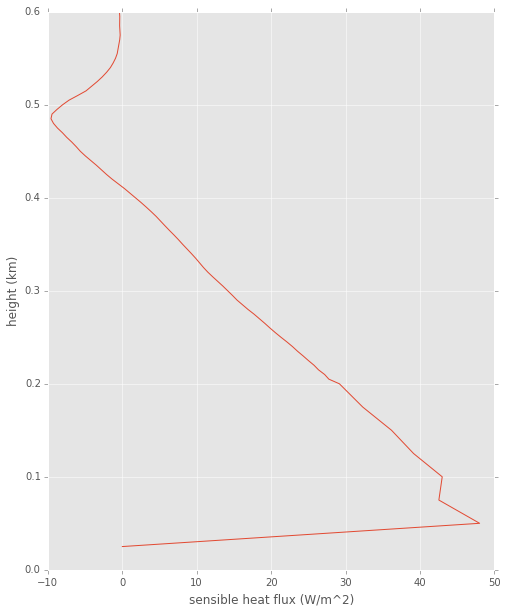

In [56]:
%matplotlib inline
plt.style.use('ggplot')
fig,ax = plt.subplots(1,1,figsize=(8,10))
ax.plot(rho*flux*cpd,z[:top_index]*1.e-3)
ax.set(xlabel='sensible heat flux (W/m^2)',ylabel='height (km)',
       ylim=(0,0.6))

4\.  Now the average tke

In [49]:
tke = 0.5*(Uperturb**2. + Vperturb**2. + Wperturb**2.)
tke = tke.mean(axis=2).mean(axis=1)

 (0, 0.6)]

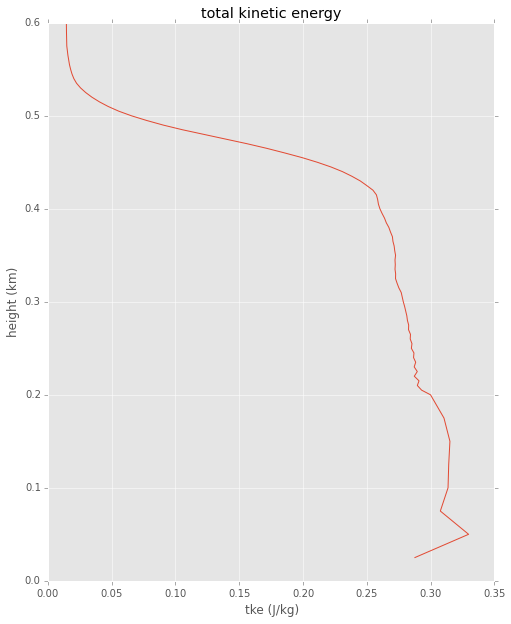

In [54]:
fig,ax = plt.subplots(1,1,figsize=(8,10))
ax.plot(tke,z[:top_index]*1.e-3)
ax.set(xlabel='tke (J/kg)',ylabel='height (km)',
       ylim=(0,0.6),title='total kinetic energy')

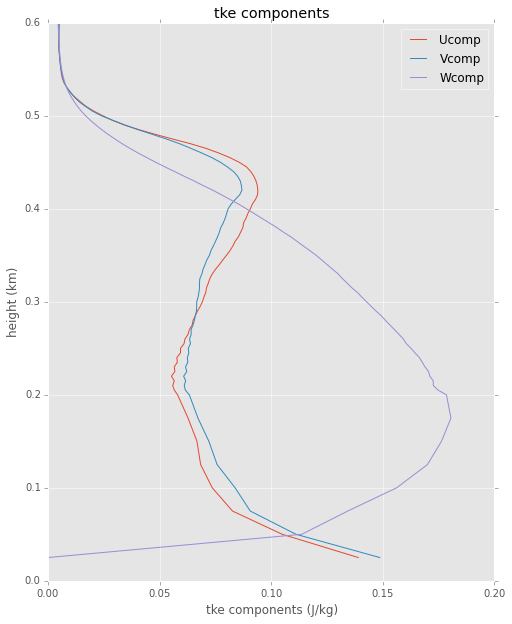

In [55]:
Ucomp=(Uperturb**2.).mean(axis=2).mean(axis=1)*0.5
Vcomp=(Vperturb**2.).mean(axis=2).mean(axis=1)*0.5
Wcomp=(Wperturb**2.).mean(axis=2).mean(axis=1)*0.5
fig,ax = plt.subplots(1,1,figsize=(8,10))
ax.plot(Ucomp,z[:top_index]*1.e-3,label='Ucomp')
ax.plot(Vcomp,z[:top_index]*1.e-3,label='Vcomp')
ax.plot(Wcomp,z[:top_index]*1.e-3,label='Wcomp')
ax.set(xlabel='tke components (J/kg)',ylabel='height (km)',
        ylim=[0,0.6],title='tke components')
ax.legend(loc='best')


